Data preview:
    Price
0   20.0
1   20.0
2   20.0
3   20.0
4   20.0
Number of rows: 70603371


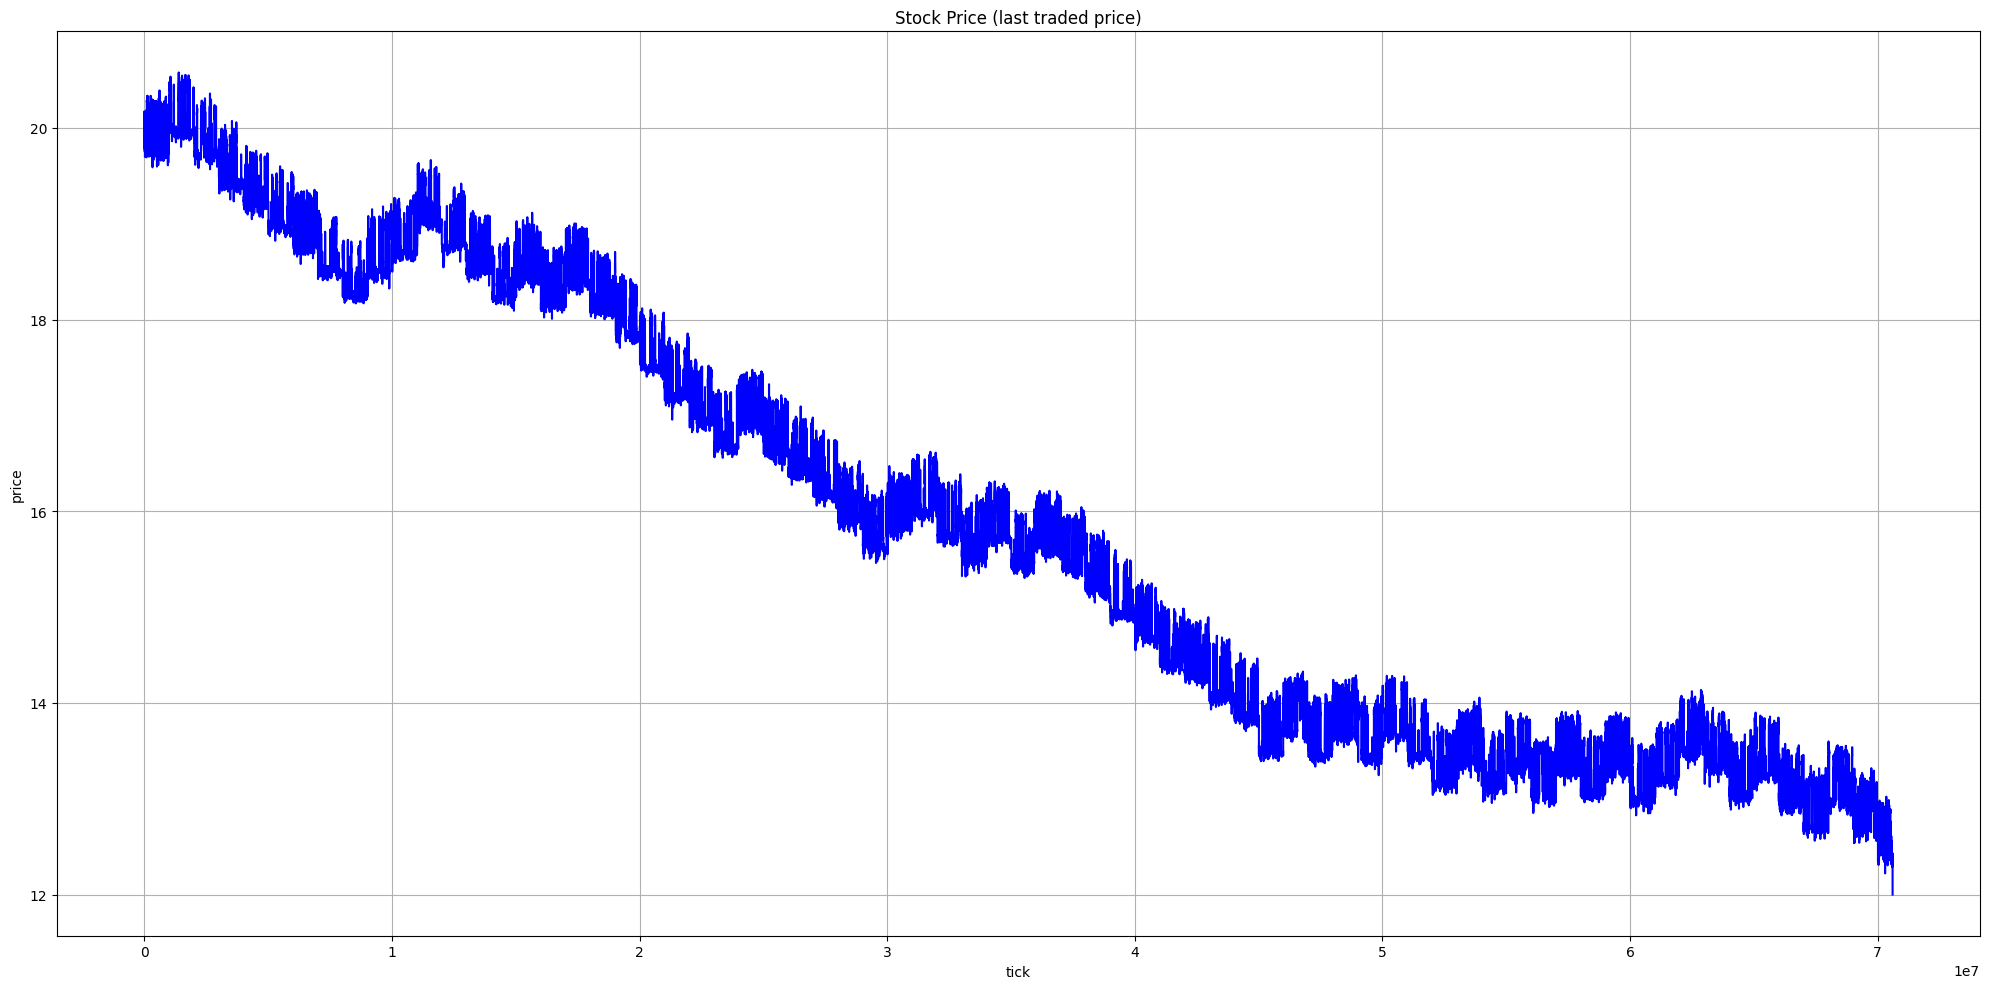

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../build/Debug/marketData.csv", header=None, names=["Price"])
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["Price"], linestyle='-', color='blue')

print("Data preview:\n", df.head())
print("Number of rows:", len(df))

plt.title("Stock Price (last traded price)")
plt.ylabel("price")
plt.xlabel("tick")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# made with gpt primarly (just visualizing data)

df = pd.read_csv('../build/Debug/ohlcv.csv', header=None, names=['open', 'high', 'low', 'close', 'volume'])
df = df[df['volume'] > 0].reset_index(drop=True)
df['index'] = df.index

fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.02   ,
    row_heights=[0.7, 0.3],
    subplot_titles=("OHLC Candlestick", "Volume")
)

fig.add_trace(go.Candlestick(
    x=df['index'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name='Price'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df['index'],
    y=df['volume'],
    marker_color='blue',
    opacity=1,
    name='Volume'
), row=2, col=1)

fig.update_layout(
    title='Candlestick Chart with Volume',
    xaxis2_title='Index',
    yaxis1_title='Price',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False,
    height=700,
    showlegend=False
)

fig.show(renderer="browser")
